<a href="https://colab.research.google.com/github/rupamnpatil/Titanic-Data-Analysis/blob/main/Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print("Data Loaded Successfully")

Data Loaded Successfully


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
print("Shape of data : ",df.shape)
df.info()

Shape of data :  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
avg_age = df["Age"].mean()
print("Average Age : ",avg_age)
df["Age"] = df["Age"].fillna(avg_age)

print(df.isnull().sum())

Average Age :  29.69911764705882
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
df.drop(columns=["Cabin","Ticket"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [12]:
print(df["Survived"].value_counts())
print(df["Sex"].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64


In [13]:
print( df.groupby("Sex")["Survived"].mean() )

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [14]:
print( df.groupby("Pclass")["Survived"].mean() )

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [15]:
rich_women = df[(df["Sex"] == "female") & (df["Pclass"] == 1)]
poor_men = df[(df["Sex"] == "male") & (df["Pclass"] == 3)]

score = rich_women["Survived"].mean()
print(f"Rich Women Survival Rate: {score:.2f}")

score = poor_men["Survived"].mean()
print(f"Poor Men Survival Rate: {score:.2f}")

Rich Women Survival Rate: 0.97
Poor Men Survival Rate: 0.14


In [16]:
survival_rate = df[ df["Age"] < 10]
print(survival_rate["Survived"].mean())

print( df.groupby("Age")["Survived"].mean() )
print( df.groupby("Survived")["Fare"].mean() )

0.6129032258064516
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [17]:
print( df.groupby("Age")["Survived"].mean() )
print( df.groupby("Survived")["Fare"].mean() )

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [18]:
df.to_csv("Titanic_Cleaned.csv", index=False)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

/tmp/ipython-input-1834343526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Sex", y="Survived", palette="viridis")


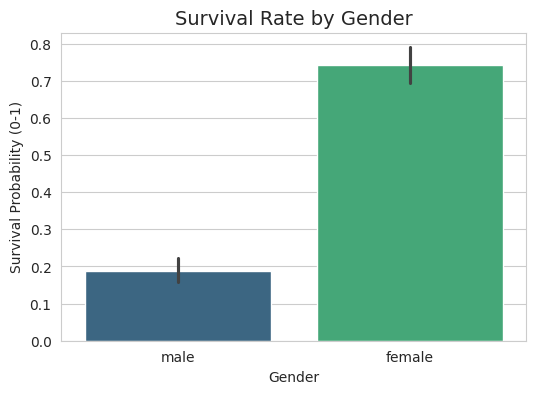

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Sex", y="Survived", palette="viridis")

plt.title("Survival Rate by Gender" , fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Survival Probability (0-1)")
plt.show()

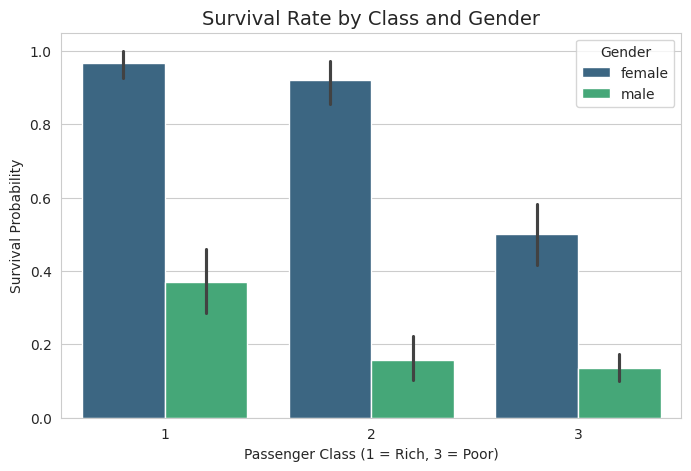

In [22]:
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex", palette="viridis")

plt.title("Survival Rate by Class and Gender", fontsize=14)
plt.ylabel("Survival Probability")
plt.xlabel("Passenger Class (1 = Rich, 3 = Poor)")
plt.legend(title="Gender")

plt.show()

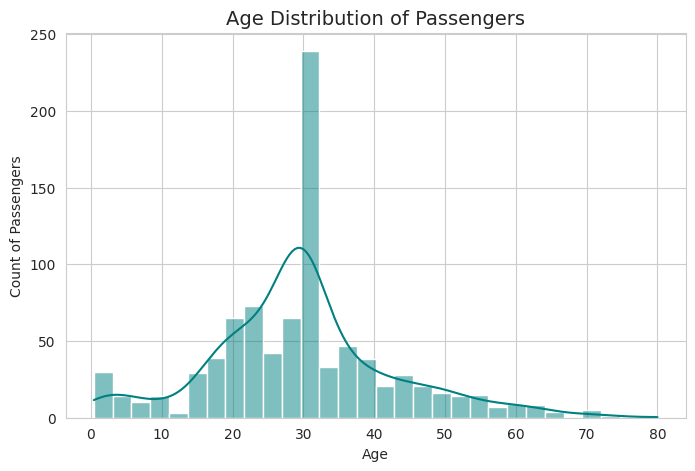

In [23]:
plt.figure(figsize=(8, 5))

# kde=True adds that smooth wavy line over the bars
sns.histplot(data=df, x="Age", bins=30, kde=True, color="teal")

plt.title("Age Distribution of Passengers", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count of Passengers")

plt.show()

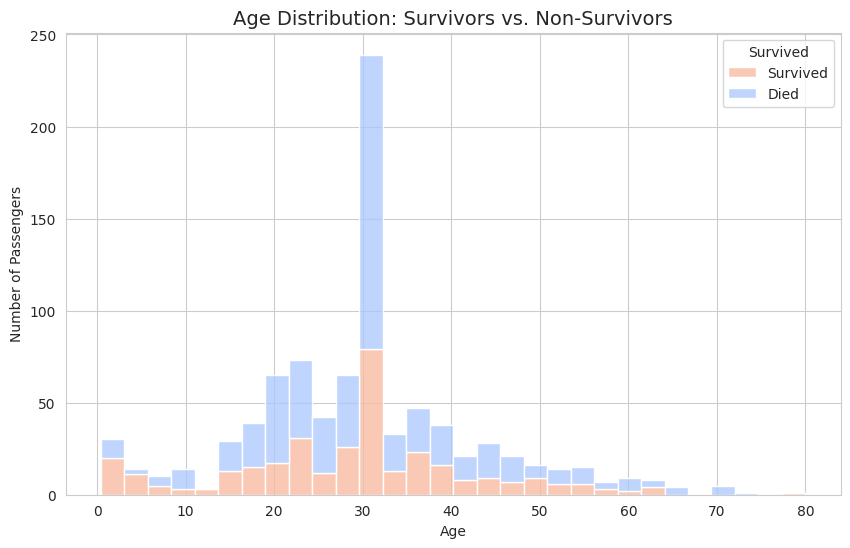

In [24]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", palette="coolwarm")

plt.title("Age Distribution: Survivors vs. Non-Survivors", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["Survived", "Died"])

plt.show()